# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to **import** any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Change the name of file with your roll no.



In [45]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 6: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

BayesA) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

BayesB) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

BayesC) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [46]:
# Cell type : CodeWrite


def mvn(x, d, mean, covariance):
    x_m = (x - mean).T
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) *
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

def eeta(inp, w, b, a) :
  return 1/(np.exp(inp @ w + b)*((1-a)/a)+1)

def function_for_A(X_train, Y_train, X_test, threshold = 0.5):
    """ Give prediction for test instance using assumption BayesA.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    n = X_train.shape[0]
    d = X_train.shape[1]
    m = X_test.shape[0]
    
    #identifying positive and negative samples mean using maximum likelihood : The mean of the samples drawn for positive and neg label
    mu1 = np.mean(X_train[np.nonzero(Y_train == 1)] , axis = 0).reshape((1,d)) 
    mu2 = np.mean(X_train[np.nonzero(Y_train == -1)] , axis = 0).reshape((1,d))
    #print(X_train.shape)
    #print(mu1.shape)
    #print(mu2.shape)

    #Identifying P(Y = 1)   
    a = (Y_train == 1).sum() / ((Y_train == 1).sum() + (Y_train == -1).sum())
    
    #Further simplifications
    b = ((np.linalg.norm(mu1)**2) - (np.linalg.norm(mu2)**2))/2
    w = (mu2 - mu1).reshape((d,1)) 

    #Initialising prediction matrix
    Y_test = np.zeros(m)
    #Calculating eeta()
    i = 0
    for testcase in X_test :
        h = eeta(testcase,w,b,a)
        if h < threshold :        
            Y_test[i]=-1
        else :           
            Y_test[i]=1    
        i = i+1
    return Y_test
    
def function_for_B(X_train, Y_train, X_test, threshold =0.5):
    """ Give prediction for test instance using assumption BayesB.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    n = X_train.shape[0]
    d = X_train.shape[1]
    m = X_test.shape[0]
    
    mu1 = np.mean(X_train[np.nonzero(Y_train == 1)] , axis = 0).reshape((1,d)) 
    mu2 = np.mean(X_train[np.nonzero(Y_train == -1)] , axis = 0).reshape((1,d))

    a = (Y_train == 1).sum() / ((Y_train == 1).sum() + (Y_train == -1).sum())
    #Finding the covariance matrix using max likelihood
    cov_mat = np.zeros((d,d))
    for i in range(n):
        if Y_train[i] == 1:
            temp = (X_train[i] - mu1)
            cov_mat = cov_mat + temp.T @ temp
        else:
            temp = (X_train[i] - mu2)
            cov_mat = cov_mat + temp.T @ temp 
    cov_mat = cov_mat / n
    Y_test = np.zeros(m) 
    for i in range(m) :
        #print(i)
        res = a*(mvn(X_test[i],d,mu1,cov_mat)) / (a*(mvn(X_test[i],d,mu1,cov_mat)) + (1-a)*mvn(X_test[i],d,mu2,cov_mat))
        if res < threshold :
          Y_test[i] = -1
        else :
          Y_test[i] = 1
    return Y_test

def function_for_C(X_train, Y_train, X_test, threshold = 0.5):
    """ Give prediction for test instance using assumption BayesC.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """

    n = X_train.shape[0]
    d = X_train.shape[1]
    m = X_test.shape[0]
    
    mu1 = np.mean(X_train[np.nonzero(Y_train == 1)] , axis = 0).reshape((1,d)) 
    mu2 = np.mean(X_train[np.nonzero(Y_train == -1)] , axis = 0).reshape((1,d))
    
    a = (Y_train == 1).sum() / ((Y_train == 1).sum() + (Y_train == -1).sum())
    b = 2*np.log(a/(1-a))  

    #Finding the covariance matrix using max likelihood
    pos_pts = X_train[Y_train == 1]
    neg_pts = X_train[Y_train == -1]

    cov_mat1 = np.zeros((d,d))
    cov_mat2 = np.zeros((d,d))

    for i in range(pos_pts.shape[0]):
        temp = (pos_pts[i] - mu1)
        cov_mat1 = cov_mat1 + temp.T @ temp 
    cov_mat1 = cov_mat1 / pos_pts.shape[0]

    for i in range(neg_pts.shape[0]):
        temp = (neg_pts[i] - mu2)
        cov_mat2 = cov_mat2 + temp.T @ temp
    cov_mat2 = cov_mat2 / neg_pts.shape[0]

    #Covariance parameter 
    covparam = (np.log((np.linalg.det(cov_mat2)**0.5)/(np.linalg.det(cov_mat2)**0.5)))
    #Finding exponent power for each Y_test and checking if it is >= 0 , then eeta(x) > 0.5
    Y_test = np.zeros(m)
    for i in range(m):
        res = a*(mvn(X_test[i],d,mu1,cov_mat1)) / (a*(mvn(X_test[i],d,mu1,cov_mat1)) + (1-a)*mvn(X_test[i],d,mu2,cov_mat2))
        if res < threshold :
          Y_test[i] = -1
        else :
          Y_test[i] = 1
    #print("Y_test is ")  
    #print(Y_test)
    return Y_test
    




In [47]:
# Cell type : Convenience

# Testing the functions above

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 
# try to remove everything or comment out your lines before submitting.


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = function_for_A(X_train, Y_train, X_test)
Y_pred_test_1b = function_for_B(X_train, Y_train, X_test)
Y_pred_test_1c = function_for_C(X_train, Y_train, X_test)

**Cell type : TextRead**

# Problem 6

#### 6a) Run the above three algorithms (BayesA,B and C), for the three datasets given (datasetA.npz, datasetB.npz, datasetC.npz) in the cell below.
#### In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately.





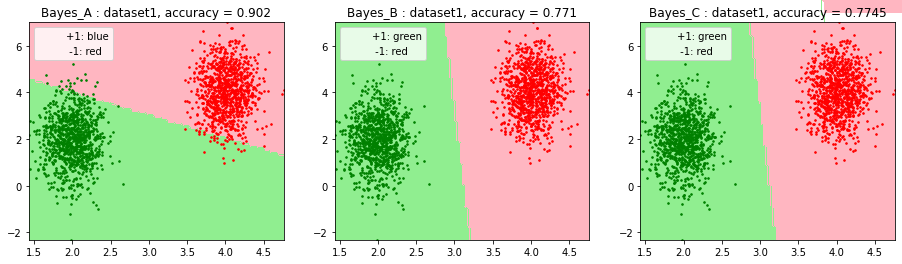

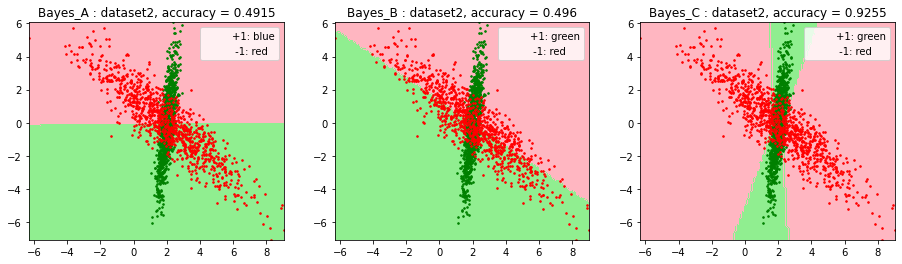

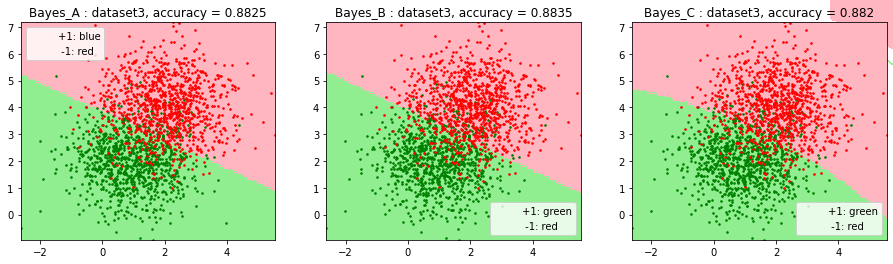

In [48]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
data1 = np.load('datasetA.npz')
data2 = np.load('datasetB.npz')
data3 = np.load('datasetC.npz')

#Loading data
X_training = np.array([data1['arr_0'], data2['arr_0'], data3['arr_0']])
Y_training = np.array([data1['arr_1'], data2['arr_1'], data3['arr_1']])
X_testing = np.array([data1['arr_2'], data2['arr_2'], data3['arr_2']])
Y_testing = np.array([data1['arr_3'], data2['arr_3'], data3['arr_3']])


#Defining error matrix
accuracy = np.zeros((3,3))

for i in range(3):
    
    X_train = X_training[i]
    Y_train = Y_training[i]
    X_test = X_testing[i]
    Y_test = Y_testing[i]
    m = Y_test.shape[0]


    #Creating contours
    x1 = np.linspace(min(X_train[:,0]),max(X_train[:,0]), 100)
    x2 = np.linspace(min(X_train[:,1]),max(X_train[:,1]), 100)
    
    x1.reshape(100,1)
    x2.reshape(100,1)
    
    xx,yy = np.meshgrid(x1,x2)
    
    x_mytest = np.column_stack((xx.ravel(), yy.ravel()))
    
    MY_pred1a = function_for_A(X_train, Y_train, x_mytest)
    MY_pred1b = function_for_B(X_train, Y_train, x_mytest)
    MY_pred1c = function_for_C(X_train, Y_train, x_mytest)

    #Taking predictions and finding accuracy
    Y_predA = function_for_A(X_train, Y_train, X_test)
    Y_predB = function_for_B(X_train, Y_train, X_test)
    Y_predC = function_for_C(X_train, Y_train, X_test)
    
    accuracy[i][0] = np.count_nonzero(Y_predA == Y_test) / m
    accuracy[i][1] = np.count_nonzero(Y_predB == Y_test) / m
    accuracy[i][2] = np.count_nonzero(Y_predC == Y_test) / m

    #Plotting training points
    xpos = X_train[np.nonzero(Y_train == 1)]
    xneg = X_train[np.nonzero(Y_train == -1)]
    
    #plt.subplot(1,8,1)        
    plt.gcf().set_size_inches(21,4)
    Data = "dataset"+str(i+1)+", accuracy = "
    p = 2.5
    
    plt.subplot(1,4,1)
    plt.contourf(xx,yy, MY_pred1a.reshape(yy.shape),colors=['lightpink','lightgreen'])
    plt.legend(('+1: blue',' -1: red'))
    plt.scatter(xpos[:,0], xpos[:,1], s= p,  color = 'g')
    plt.scatter(xneg[:,0], xneg[:,1], s= p,   color = 'r')
    plt.title('Bayes_A : '+Data + str(accuracy[i][0]), fontsize=12) 
    
    plt.subplot(1,4,2)
    plt.contourf(xx,yy, MY_pred1b.reshape(yy.shape),colors=['lightpink','lightgreen'])
    plt.legend(('+1: green',' -1: red'))
    plt.scatter(xpos[:,0], xpos[:,1], s= p, color = 'g')
    plt.scatter(xneg[:,0], xneg[:,1], s= p, color = 'r')
    plt.title('Bayes_B : '+Data + str(accuracy[i][1]), fontsize=12)

    plt.subplot(1,4,3)
    plt.contourf(xx,yy, MY_pred1c.reshape(yy.shape),colors=['lightpink','lightgreen'])
    plt.legend(('+1: green',' -1: red'))
    plt.scatter(xpos[:,0], xpos[:,1],s= p, color = 'g')
    plt.scatter(xneg[:,0], xneg[:,1], s= p,color = 'r')
    plt.title('Bayes_C : '+Data + str(accuracy[i][2]), fontsize=12)

    plt.show()



####6b) Give the ROC Curves for all the classifiers.



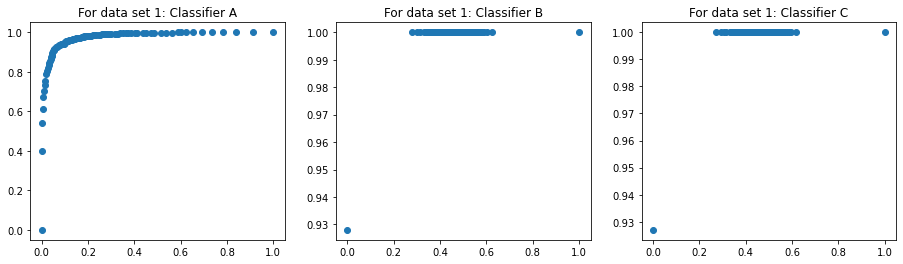

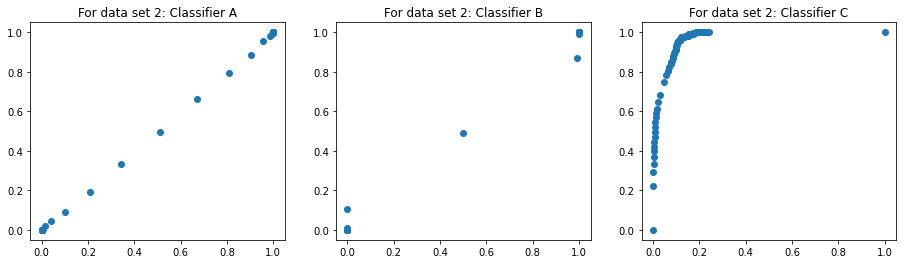

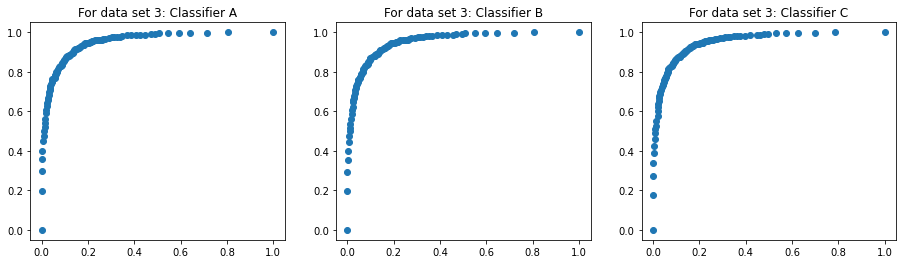

In [49]:
def roc(Y_test, Y_pred) :
  tp =  ((Y_test+Y_pred) == 2).sum()
  fp =  ((Y_test-Y_pred) == -2).sum()
  tn =  ((Y_test+Y_pred) == -2).sum()
  fn =  ((Y_test-Y_pred) == 2).sum()
  return fp/(tn + fp),tp/(tp+fn)

threshold_vals = np.linspace(0,1,101)
data1 = np.load('datasetA.npz')
data2 = np.load('datasetB.npz')
data3 = np.load('datasetC.npz')

#Loading data
X_training = np.array([data1['arr_0'], data2['arr_0'], data3['arr_0']])
Y_training = np.array([data1['arr_1'], data2['arr_1'], data3['arr_1']])
X_testing = np.array([data1['arr_2'], data2['arr_2'], data3['arr_2']])
Y_testing = np.array([data1['arr_3'], data2['arr_3'], data3['arr_3']])

x_coords = [[],[],[]]
y_coords = [[],[],[]]

for i in range(3):
    X_train = X_training[i]
    Y_train = Y_training[i]
    X_test = X_testing[i]
    Y_test = Y_testing[i]
    m = Y_test.shape[0]

    for t in threshold_vals :
      MY_pred1a = function_for_A(X_train, Y_train, X_test,t)
      x,y = roc(Y_test,MY_pred1a)
      x_coords[0].append(x)
      y_coords[0].append(y)
      MY_pred1b = function_for_B(X_train, Y_train, X_test,t)
      x,y = roc(Y_test,MY_pred1b)
      x_coords[1].append(x)
      y_coords[1].append(y)
      MY_pred1c = function_for_C(X_train, Y_train, X_test,t)
      x,y = roc(Y_test,MY_pred1c)
      x_coords[2].append(x)
      y_coords[2].append(y)

    plt.gcf().set_size_inches(21,4)

    plt.subplot(1,4,1)
    plt.scatter(x_coords[0],y_coords[0])
    plt.title("For data set " + str(i+1) + (": Classifier A"))
    
    plt.subplot(1,4,2)
    plt.scatter(x_coords[1],y_coords[1])
    plt.title("For data set " + str(i+1) + (": Classifier B"))

    plt.subplot(1,4,3)
    plt.scatter(x_coords[2],y_coords[2])
    plt.title("For data set " + str(i+1) + (": Classifier C"))

    plt.show()

    x_coords = [[],[],[]]
    y_coords = [[],[],[]]

####6c) In the next Textwrite cell, give the error rate of the three classifiers on the three datasets as 3x3 table, with appropriately named rows and columns.




**Error Rate** | Bayes\_1a | Bayes\_1b | Bayes\_1c
--- | :---: | :---: | :---:
dataset1\_**1** | 0.098  | 0.1245 | 0.1245
dataset1\_**2** | 0.5085| 0.504     | 0.0745  
dataset1\_**3** | 0.1175  | 0.1185  | 0.118

####6d) In the next Textwrite cell, summarise your observations regarding the nine learnt classifiers.

**Cell type : TextWrite**
(Write your observations and table of errors here)
